In [154]:
# Imports necessary Packages
import matplotlib
import numpy as np
import scipy as sp

# Specific Plotting Packages
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Specific Stats Packages
from scipy.stats import gaussian_kde
from scipy.stats import truncexpon
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2

%matplotlib inline

# for Q map
from scipy import optimize


# Thing Exampl

Stuff


## Define Map and Simulate the Data
Here we've embedded the stochasticity inside the model map Q. In addition, we create a simulated data set by drawing samples from the "true" distribution of lambda 1 and lambda 2 and passing them through the model Q. Since the stochasticity is embedded in the model Q, the error $\eta$ is not accessible (or saved).

In addition, we don't have access to a prior distribution to sample the error term!

In [227]:
# Defines the Q Map (including stochastic parameter)
def Q(lam1,lam2):
    ## input checks
    lam1_m = lam1
    lam2_m = lam2
    
    # checks lam1 is numeric and converts to np.ndarray if possible
    if lam1!=np.ndarray:
        try: lam1_m = np.asarray(lam1)
        except ValueError: ("Couldn't convert to nupmy array! Check that lam1 is a numeric array.")        
    
    # checks lam2 is numeric and converts to np.ndarray if possible
    if lam2_m!=np.ndarray:
        try: lam2_m = np.asarray(lam2)
        except ValueError: ("Couldn't convert to nupmy array! Check that lam1 is a numeric array.")
    
    
    
    # number of values to evaluate QoI
    lam1_size = np.size(lam1_m)
    lam2_size = np.size(lam2_m)
    
    ### RANDOM STOCHASTICISTY INTRODUCED
    lam1_m = lam1_m + np.random.normal(0,0.5,lam1_size)**2
    lam2_m = lam2_m + np.random.normal(0,0.5,lam2_size)**2
    
    
    # Empty QoI vector
    q = np.zeros(lam1_size)
    
    
    ### Calculates the QoI for the given lam1 and lam2 values
    for i in np.arange(lam1_size):
        # sets up nonlinear system for the solver
        def G(x):    
            # create coefficient matrix of nonlinear system
            A = np.reshape([lam1_m.item(i),1,1,-lam2_m.item(i)],(2,2))

            # compute matrix-vector multiplication, then subtract 1
            return A @ x**2 - 1

        # finds the x-coordinates in Q1 that satisfy the model
        x = optimize.fsolve(G,[1,1])
        
        # save QoI
        q[i] = x[1] # quantity of interest is second coordinate 
        
    return q

Generating the simulated data:

In [228]:
data_sample_size = 500

In [229]:
# generate data
# simulate data by sampling uniforms 
lam1_data = uniform.rvs(0.5,0.5,data_sample_size)
lam2_data = uniform.rvs(0.75,0.5,data_sample_size)

# simulated QoI data from data variable samples
q_data = Q(lam1_data,lam2_data)

# calculate a gaussian kde for data
data_kde_pdf = gaussian_kde(q_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


Reasonability check:

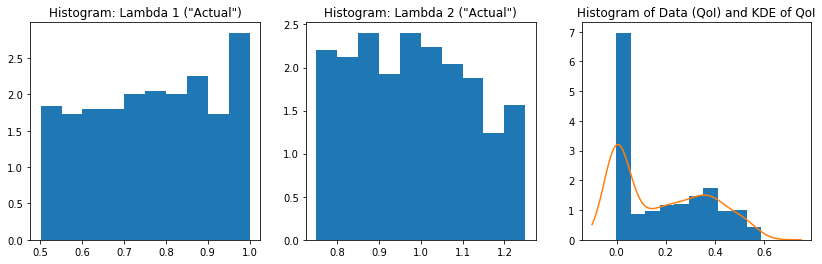

In [230]:
# check that the KDE is reasonable for the q_data
q_values = np.linspace(-0.1,0.75,100) # plot pdf for these "x-values"

# check that the simulation makes sense by plotting!
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figwidth(14)

# Comparison of exact pdf vs. density
ax1.set_title('Histogram: Lambda 1 ("Actual")')
ax1.hist(lam1_data, density=True)
ax2.set_title('Histogram: Lambda 2 ("Actual")')
ax2.hist(lam2_data, density=True)

# histogram of data
ax3.set_title("Histogram of Data (QoI) and KDE of QoI")
ax3.hist(q_data, density=True) 
ax3.plot(q_values,data_kde_pdf(q_values))

## Solve for $\lambda_1$ and $\lambda_2$ Using Consistent Bayes
Now that we have the dataset and a model for our simulation, we attempt to construct a solution distribution for the consistent Bayes method using the Accept-Reject paradigm.

The purpose of using the paradigm in this example is to show how we **may not even need to assume a prior on the stochastic term** to calculate the distribution of $\lambda_1$ and $\lambda_2$!


### Construct the Push-Forward KDE
We construct the push-forward KDE for the denominator of the consistent baye's ratio by sampling the prior. Note that we don't need to sample a prior for our stochastic error term because it is embedded in the calculation of the map $Q$!

In [231]:
# defines prior class objects using scipy package (imported at the top)
# use "rvs" method to generate samples from these objects
# use "pdf" method to evaluate the pdf at a given value
lam1_prior = uniform(0.5,0.5)
lam2_prior = uniform(0.75,0.5)


In [232]:
# generate a sample from our PRIOR pdfs
lam1_sample_prior = lam1_prior.rvs(1000)
lam2_sample_prior = lam2_prior.rvs(1000)


In [233]:
q_sample_prior = Q(lam1_sample_prior,lam2_sample_prior)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


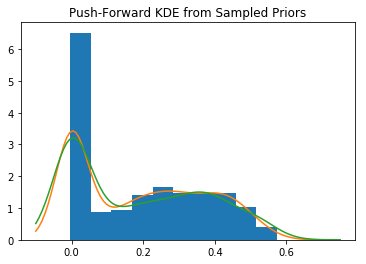

In [234]:
# calculate a gaussian kde for the push-forward of the sampled priors
push_forward_kde_pdf = gaussian_kde(q_sample_prior)

# sanity check: Is push-forward KDE close to what we expect?
q_values = np.linspace(-0.1,0.75,100) # plot pdf for these "x-values"

plt.title("Push-Forward KDE from Sampled Priors")
plt.hist(q_sample_prior, density=True) # histogram of data
plt.plot(q_values,push_forward_kde_pdf(q_values)) # plot of KDE

plt.plot(q_values,data_kde_pdf(q_values)) # this is the data KDE compared to the push forward

### Use Accept-Reject to Generate Posterior Samples

In [235]:
# calculate maximum of the ratio
M = np.max(data_kde_pdf(q_sample_prior)/push_forward_kde_pdf(q_sample_prior))

# generate random numbers from uniform for accept-reject for each sample value
test_value = np.random.uniform(0,1,np.shape(q_sample_prior))

# calculate the ratio for accept reject: data_kde/push_kde/M and compare to test sample
# is the kde ratio > test value?
accept_or_reject_samples = np.greater(data_kde_pdf(q_sample_prior)/push_forward_kde_pdf(q_sample_prior)/M,
                            test_value)

# accepted values of posterior sample
posterior_lam1_sample = lam1_sample_prior[accept_or_reject_samples]
posterior_lam2_sample = lam2_sample_prior[accept_or_reject_samples]

print(np.shape(posterior_lam1_sample))


(598,)


We check to make sure the posterior samples are reasonable by plotting the posterior samples of $\lambda_1$ and $\lambda_2$.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


(array([ 6.96784648,  0.87943693,  0.98091043,  1.18385741,  1.21768191,
         1.48827789,  1.75887387,  0.98091043,  1.01473492,  0.43971847]),
 array([-0.00256269,  0.05656605,  0.11569479,  0.17482354,  0.23395228,
         0.29308102,  0.35220976,  0.41133851,  0.47046725,  0.52959599,
         0.58872473]),
 <a list of 10 Patch objects>)

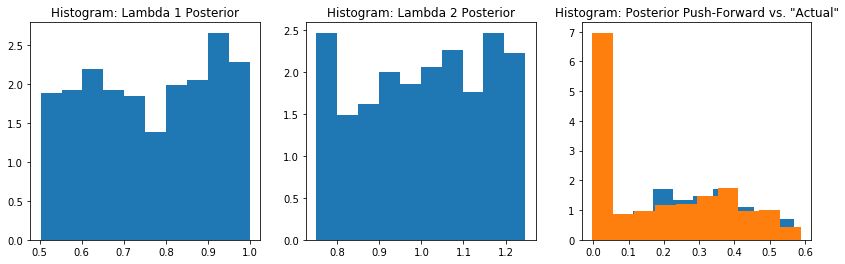

In [236]:
# this is the push forward of the posterior samples
push_forward_posterior_samples = Q(posterior_lam1_sample,posterior_lam2_sample)

# check that the simulation makes sense by plotting!
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_figwidth(14)
# Comparison of exact pdf vs. density
ax1.set_title('Histogram: Lambda 1 Posterior')
ax1.hist(posterior_lam1_sample, density=True)
ax2.set_title('Histogram: Lambda 2 Posterior')
ax2.hist(posterior_lam2_sample, density=True)

ax3.set_title('Histogram: Posterior Push-Forward vs. "Actual"')
ax3.hist(push_forward_posterior_samples, density=True)
ax3.hist(q_data, density=True)

The graphs above show that our posterior sample is doing a decent job at reproducing our original "true" distributions.

## How sensitive is this kind of modeling to different priors?